# Logistinė regresija ir kiti klasifikatoriai

<br>

---

Mašininiame mokymęsi logistinė regresija naudojama klasifikacijos problemoms spręsti, ir atsako į klausimą taip, arba ne (priklauso elementas kokiai nors kategorijai ar ne). Jeigu 1 - taip, jeigu 0 -ne. 

![](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

Kreivė yra S formos, sigmoidas. Y ašyje matome reikšmes, nuo 0 iki 1. Tai yra mūsų atsakymas - taip arba ne. Reikšmės <0 ar >1 mes gauti negalime. X ašyje gali būti mūsų kintamieji. Pagal reikšmę X ašyje, naudojantis kreive,  surandama reikšmė Y ašyje. Tuomet pagal tai, ar reikšmė yra aukščiau ar žemiau vidurinės linijos, nusprendžiama, kuriai kategorijai ją priskirti. Čia yra [filmukas](https://youtu.be/yIYKR4sgzI8?t=189) (anglų k.), paprastai paaiškinantis logistinės regresijos veikimą.  

importuokime bibliotekas:

In [37]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [38]:
%matplotlib inline

Dirbsime su labai populiaria iris(liet. *vilkdalgis*) gėlių lentele. Mūsų modelis, pagal gėlės dalių išmatavimus turės atspėti tos gėlės porūšį. Lentelę turime integruotą seaborn bibliotekoje:

In [39]:
iris = sns.load_dataset('iris')

In [40]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Kam įdomu, kas yra petal ir sepal, iliustracija:

![](https://cdn.britannica.com/s:1500x700,q:85/06/63306-004-0406576D/flower-part-purpose-seeds-making-insects-pollination.jpg)

Tikriname stulpelių informaciją:

In [41]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Įsitikinę, kad su trūkstamų reikšmių nėra, galime šiek tiek patyrinėti duomenis:

<Axes: xlabel='species', ylabel='count'>

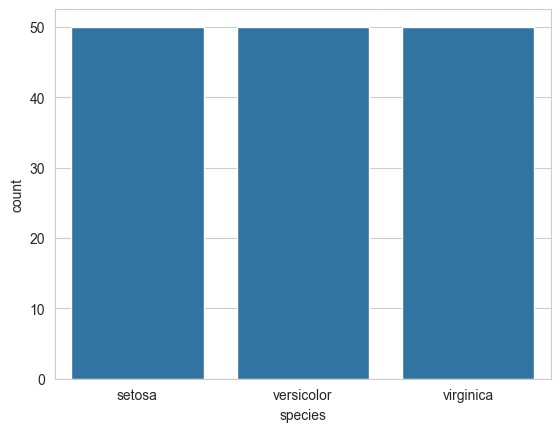

In [43]:
sns.countplot(x=iris['species'])

Visų po lygiai :)

Pažiūrėkime, kaip išsibarsto rūšys pagal visas išmatavimų kombinacijas:

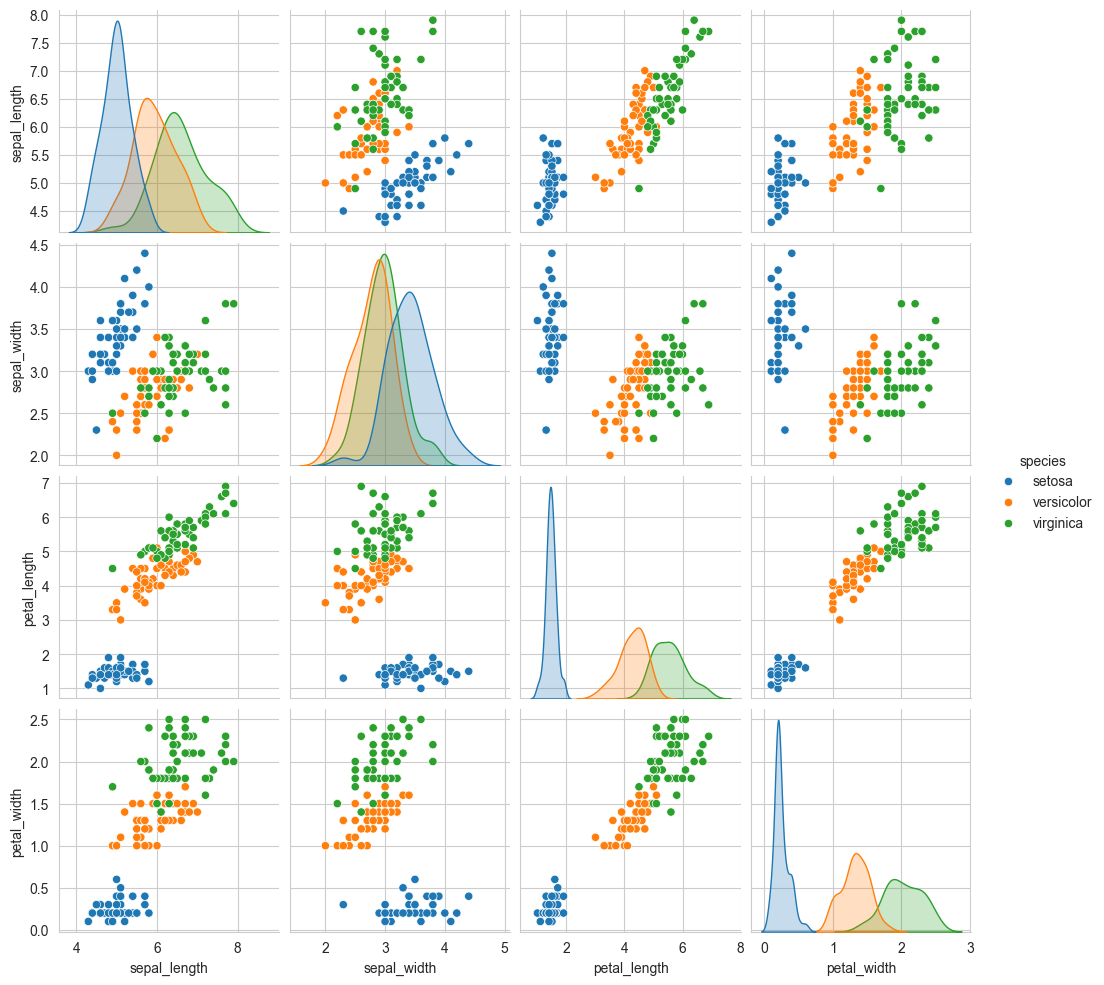

In [44]:
sns.pairplot(iris, hue='species')

Matome, kad rūšys linkę grupuotis, beveik pagal visas kombinacijas. Tai palanku klasifikavimo algoritmų tikslumui. Dar žvilgtelkime į koreliacijas ir pradėsime.

In [45]:
iris_corr = iris.corr(numeric_only=True)

<Axes: >

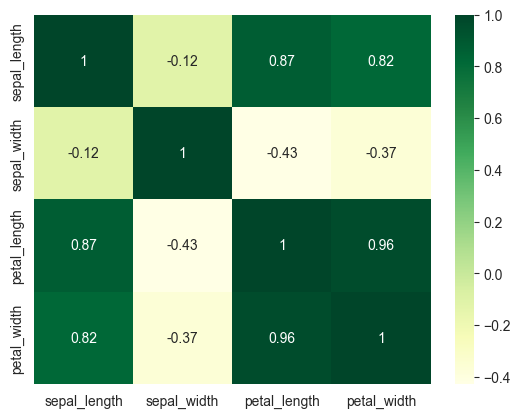

In [46]:
sns.heatmap(iris_corr, annot=True, cmap='YlGn')

### Duomenų paruošimas

Duomenų paruošimas nelabai skirsis nuo duomenų paruošimo tiesinės regresijos atveju. Atskirkime *target* stulpelį nuo likusių duomenų:

In [47]:
cols = iris.columns.tolist()
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [48]:
X = iris[cols[:-1]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y = iris['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.4, random_state=42)

importuokime logistinės regresijos modelį ir apmokykime jį:

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

Patikrinkime modelio tikslumą:

In [52]:
model.score(X_train, y_train)

0.9555555555555556

Neblogai :) Toliau darysime praktiškai tą patį, kaip ir tiesinės regresijos paskaitoje, kad šalia sudėtumėm spėjimus ir tikrąsias reikšmes.

In [53]:
preds = model.predict(X_test)
preds

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor'], dtype=object)

In [54]:
spejimai = pd.Series(data=preds, name='Spėjimas')

In [55]:
res = pd.concat([y_test.reset_index(), spejimai], axis=1)[['species', 'Spėjimas']]

In [56]:
res.head(50)

,species,Spėjimas
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


Išfiltruokime nepasisekusius spėjimus:

In [57]:
res[res['species'] != res['Spėjimas']]

,species,Spėjimas


In [58]:
res.shape

(60, 2)

Dar vienas būdas, plačiai naudojamas klasifikacijos rezultatams interpretuoti yra *confusion matrix*:

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 18]], dtype=int64)

<Axes: >

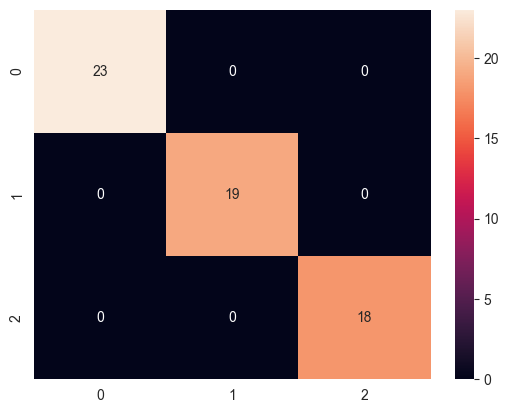

In [60]:
sns.heatmap(cm, annot=True)

kaip interpretuoti? Pasiskolinkime diagramą:
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png)

Y ašyje turime tikrąsias reikšmes, X ašyje spėjimus. Ten kur spėjimas sutampa su tikrąja reikšme (įstrižainėje), turime pataikymus. Likusios reikšmės - šūviai pro šalį.

# Kiti klasifikatoriai

Logistinė regresija nėra vienintelis klasifikavimo modelis. Iš tiesų, jų yra labai daug. Vieni tam tikriems duomenims tinka labiau, kiti geresni su kitokio pobūdžio duomenimis. Panagrinėkime dar porą populiarių variantų:

### Decision Trees

![](https://www.sqlshack.com/wp-content/uploads/2019/09/sample-of-a-decision-tree.png)

Į Decision Tree galima žiūrėti, kaip į *if-else* sąlygų rikiuotę. Algoritmas atsirenka, koks stulpelis turi didžiausią įtaką rezultatui. Tuomet juos išsidėlioja reikiama tvarka ir tikrina prie kokios stulpelio reikšmės koks yra atsakymas. Galima sakyti, leidžia duomenis žemyn, kaip per filtrą. Tokiu būdu mokosi. Iris lentelės atveju, procesas atrodytų maždaug taip:

![](https://github.com/adityashrm21/adityashrm21.github.io/blob/master/_posts/imgs/dt/dtree_big.png?raw=True)

Apie *decision trees* galite pažiūrėti [čia](https://www.youtube.com/watch?v=7VeUPuFGJHk)

Turime paruoštus duomenis, kuriuos galime nesunkiai praleisti per klasifikatorių: 

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9666666666666667

turėkite omenyje, kad DecisionTree dažniau bus neefektyvus, negu efektyvus :) Dirbame su 'žaisliniais' duomenimis. 

### Random Forests

Random Forests yra galingas klasifikatorius, sukurtas *DecisionTrees* pagrindu. Jis generuoja daug *DecisionTree modelių*, kuriuose atsitiktine tvarka išdėstytos kategorijos: 

![](https://i.stack.imgur.com/iY55n.jpg)

Įsivaizduokite tų medelių ne tris, o 1000 :). Nurodykime juos parametruose:

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000).fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9833333333333333

Dirbdami su rimtesniais duomenimis, pajausite, kaip tokių 'miškelių' generavimas apkrauna kompiuterio resursus. Bet tuo pačiu galėsite įvertinti, koks stiprus klasifikatorius yra RandomForests.

### KNearrest Neighbors

KNearest Neighbors veikimo principą nesudėtinga suprasti - skaičiuojami atstumai iki artimiausių kaimynų.

![](https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif)

kokiai klasei priklausančių kaimynų 'mėginys' turi daugiausiai, tai klasei ir priskiriamas.

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)
knc.score(X_test, y_test)

1.0

Pažiūrėkime, kaip KNN sekasi spėlioti žuvies rūšis (medžiaga iš praeitos užduoties)

In [64]:
fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')
XX = fish[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']]
yy = fish['Species']

In [65]:
XX_train, XX_test, yy_train, yy_test = \
train_test_split(XX, yy, test_size=0.33, random_state=42)
fish_knc = KNeighborsClassifier(n_neighbors = 7).fit(XX_train, yy_train)
fish_knc.score(XX_test, yy_test)

0.6226415094339622

matome, kad ne itin gerai sekasi. Taip yra todėl, kad duomenys 'atstumais' yra gana stipriai išsibarstę, o KNN mėgsta juos labiau sugrupuotus, todėl didesnėms reikšmėms reikia taikyti tam tikrus koeficientus. Rankiniu būdu to daryti nereikės, scikit-learn turi tam skirtus integruotus metodus.

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(XX) # sukuriame StandardScaler objektą
scaled_features = scaler.transform(XX) # perdarome reikšmes į KNN klasifikatoriui priimtinesnį formatą
scaled_features[:4]

array([[-0.30578858, -0.28230301, -0.10602023,  0.59657867, -0.23652895,
        -0.43807217],
       [-0.22550724, -0.19805366, -0.00233668,  0.82126055, -0.06657895,
        -0.30356218],
       [-0.23554241, -0.17933159, -0.01097698,  0.79734129,  0.16579317,
        -0.16344761],
       [ 0.0053016 ,  0.05469437,  0.19639012,  0.87977146,  0.022621  ,
        -0.09899491]])

Gavome numpy array, kurios pagrindu sulipdysime naują lentelę.

In [67]:
features = pd.DataFrame(scaled_features, columns=XX.columns)

In [68]:
features.head()

,Length1,Length2,Length3,Height,Width,Weight
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,-0.438072
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,-0.303562
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793,-0.163448
3,0.005302,0.054694,0.196390,0.879771,0.022621,-0.098995
4,0.025372,0.054694,0.239592,0.812835,0.426371,0.088759


In [69]:
XX_train, XX_test, yy_train, yy_test = \
train_test_split(features, yy, test_size=0.33, random_state=42)
fish_knc = KNeighborsClassifier(n_neighbors = 12).fit(XX_train, yy_train)
fish_knc.score(XX_test, yy_test)

0.7735849056603774

Geriau :) Dabar pabandykime surasti optimalią n_neighbors reikšmę:

In [70]:
def find_optimal(neighbors):
    score_list = []
    for i in range(neighbors):
        fishies = KNeighborsClassifier(n_neighbors = i+1).fit(XX_train, yy_train)
        score_list.append(fishies.score(XX_test, yy_test))
    return score_list
    

<Axes: >

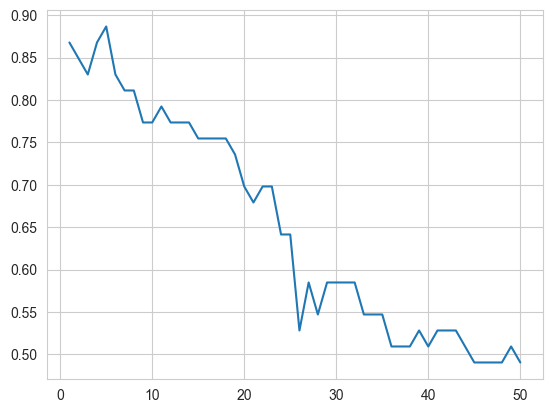

In [71]:
sns.set_style('whitegrid')
sns.lineplot(x=range(1, 51), y=find_optimal(50))

In [72]:
max_val = max(find_optimal(50))
max_index = find_optimal(50).index(max_val) + 1 
print(f'max score - {max_val}, optimal n_neighbors={max_index}')

max score - 0.8867924528301887, optimal n_neighbors=5


<br>
<br>

# Užduotys:

---

Užduočių sprendimui mums reikalingi kai kurie įrankiai ir duomenys.<br>

Siekinat sklandaus darbo rezultato, kai kurie įrankiai šioje temoje pasikartoja.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
%matplotlib inline

In [75]:
heart = pd.read_csv('heart.csv')

In [76]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<img src="heart.jfif">

<br>
<br>

## Užduoties sąlyga:

Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):

* importuokite bibliotekas, nuskaitykite csv failą (copy paste iš šio dokumento)

* išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.

* patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.

* paruoškite duomenis modelio apmokymui
apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite confusion matricas.

* pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.

* apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite confusion matricą.

* kuris modelis efektyviausias?

* Palyginkite confusion matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)

Dėl medicinos terminų nesijaudinkite, mums tikrai nereikia visko suprasti.

<Axes: xlabel='target', ylabel='count'>

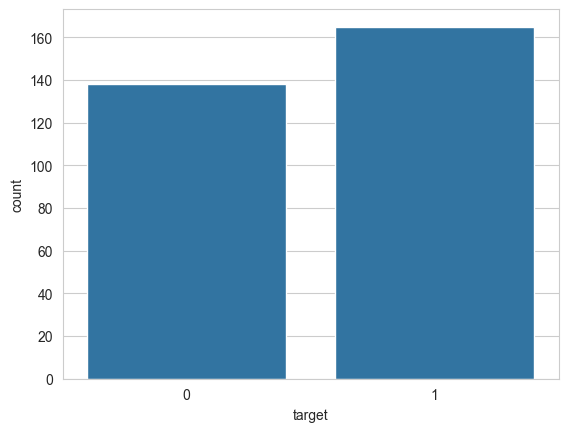

In [77]:

sns.countplot(x=heart['target'])

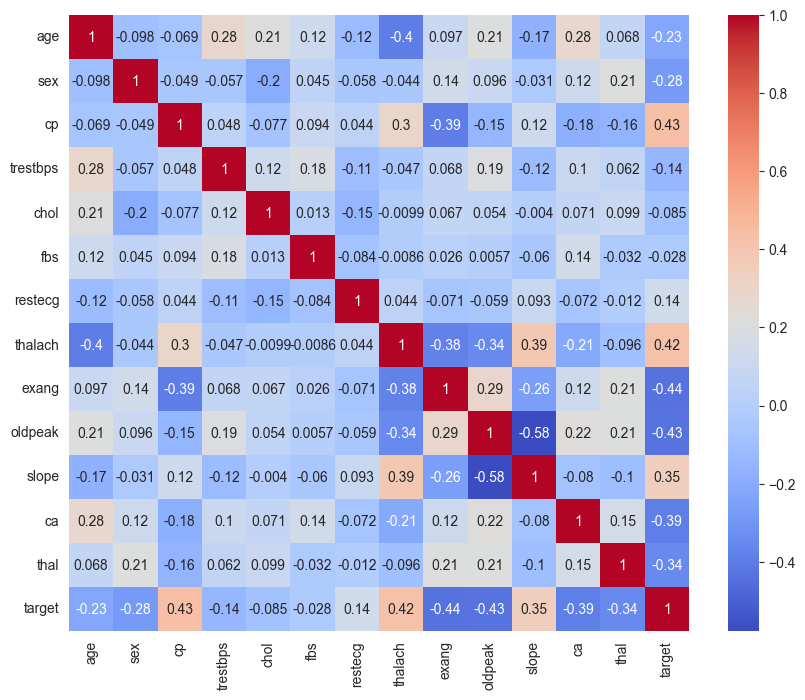

In [78]:
f, ax = plt.subplots(figsize=(10, 8))
mtx = sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')

Įdomu tai, kad su target reikšme labiausiai koreliuoja fizinio krūvio metu nustatomi rodikliai. O kraujo spaudimas ir cholesterolis koreliuoja labai menkai. Palyginti, nemažai įtakos turi amžius ir lytis.

In [79]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='trestbps', ylabel='chol'>

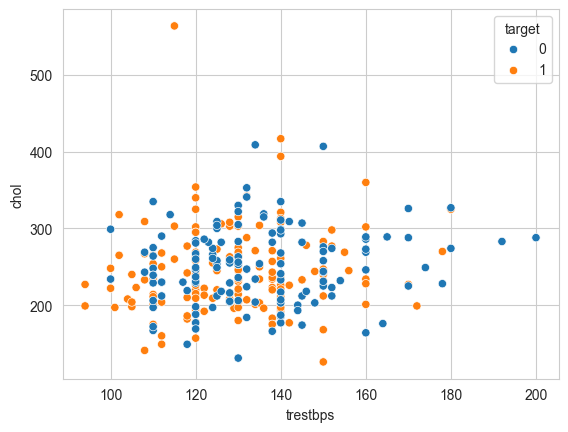

In [80]:
sns.set_style('whitegrid')
sns.scatterplot(x='trestbps', y='chol', data=heart, hue='target')

Deja, sunkiai pavyksta atspausdinti kažką, kas rodytų didesnius kontrastus. Pamėginkime .pairplot() su išmestomis kategorinėmis reikšmėmis:

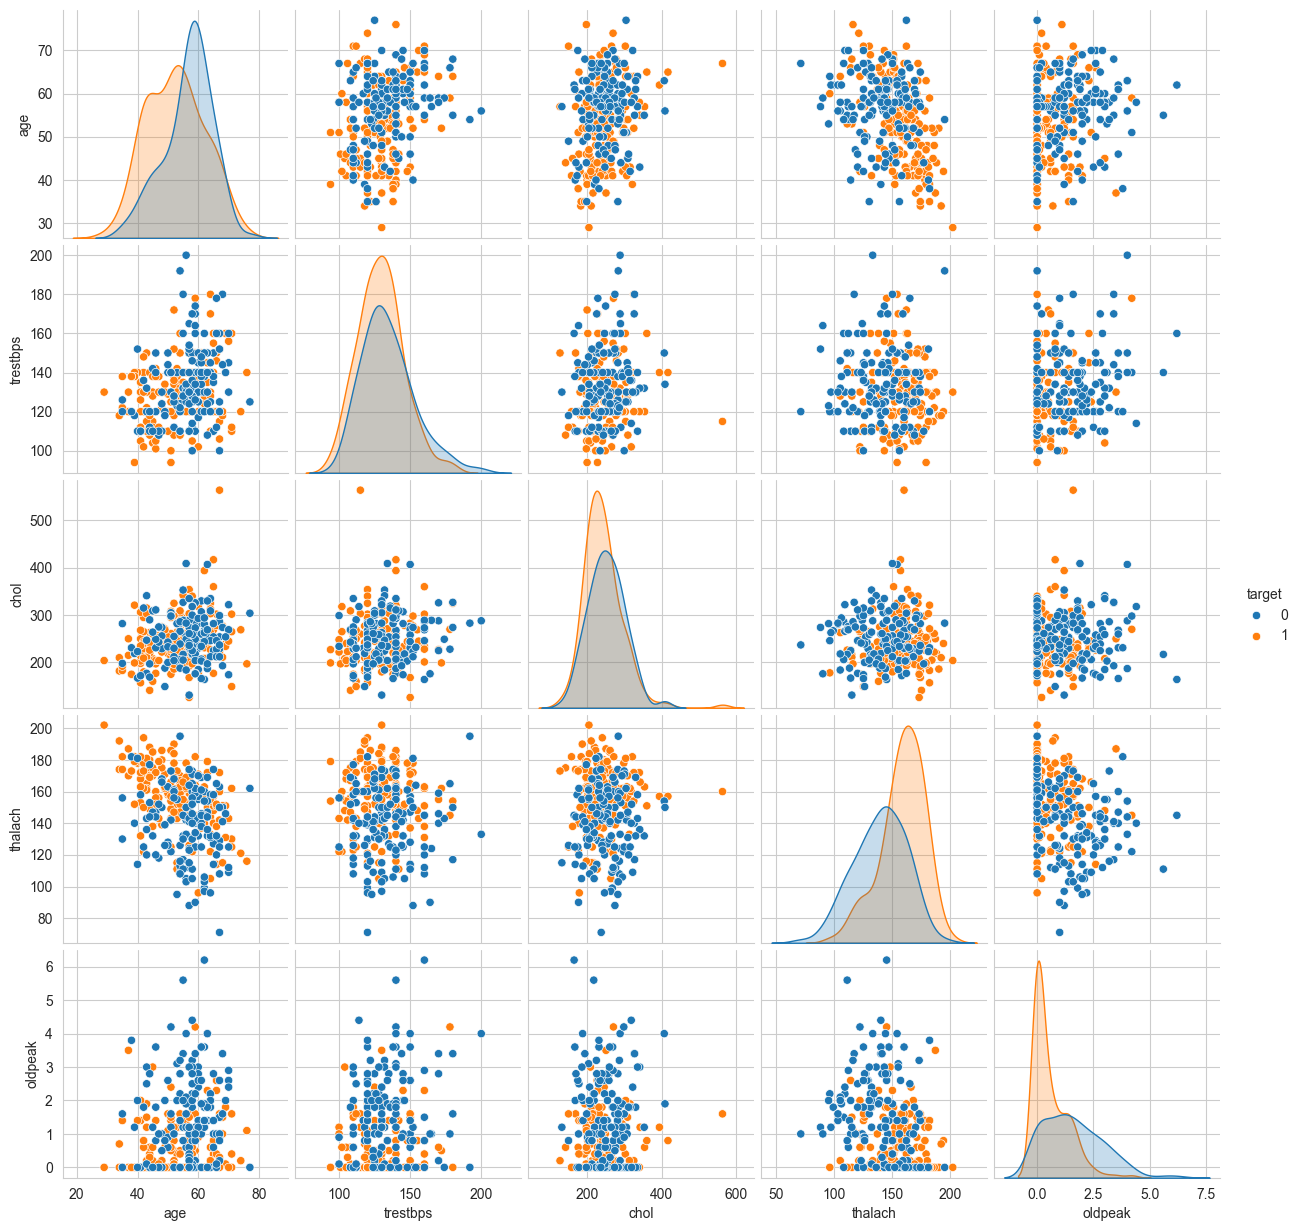

In [81]:
sns.pairplot(heart.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']), hue='target')

Panašu, kad target reikšmės tam tikrose porose grupuojasi, galime tikėtis neblogų modelių efektyvumų.

In [82]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [83]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Išrinksime kategorines reikšmes, kurios turi daugiau negu 2 reikšmes, sukursime dummies:

In [84]:
heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [85]:
heart['slope'].unique()

array([0, 2, 1], dtype=int64)

In [86]:
heart['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [87]:
heart['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [88]:
dummies_cp = pd.get_dummies(heart['cp'])
dummies_cp.columns = ['cp0', 'cp1', 'cp2', 'cp3']
dummies_slope = pd.get_dummies(heart['slope'])
dummies_slope.columns = ['slope0', 'slope1', 'slope2']
dummies_ca = pd.get_dummies(heart['ca'])
dummies_ca.columns = ['ca0', 'ca1', 'ca2', 'ca3', 'ca4']
dummies_thal = pd.get_dummies(heart['thal'])
dummies_thal.columns = ['thal0', 'thal1', 'thal2', 'thal3']

In [89]:
dummies = pd.concat([dummies_ca, dummies_cp, dummies_slope, dummies_thal], axis=1)
dummies.head()

,ca0,ca1,ca2,ca3,ca4,cp0,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
1,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


Dummies sukurti, dabar jungsime su pagrindine lentele:

In [90]:
heart.drop(columns = ['ca', 'cp', 'slope', 'thal'], inplace=True)
df = pd.concat([heart, dummies], axis=1)

In [91]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,1,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,1,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,1,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,1,...,False,False,False,False,False,True,False,False,True,False


In [92]:
X = df.drop('target', axis=1)

In [93]:
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca0,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,True,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,True,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,True,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,True,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,True,...,False,False,False,False,False,True,False,False,True,False


In [94]:
y = df['target']

In [95]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Viskas!<br>

Visus kitus kodų parametrus galime imti iš paskaitos metu pateiktos medžiagos!

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.4, random_state=42)

<br>
<br>

## Logistic Regression